<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-albedo" data-toc-modified-id="Calculate-albedo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate albedo</a></span></li><li><span><a href="#omega" data-toc-modified-id="omega-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>omega</a></span></li></ul></div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

In [3]:
lat0, lat1 = -5, 5
lon0, lon1 = 143, 153
h = "h2" # h3 = omega850,700,500,200; h2 = lw sw fluxes

ds = ap.load_dates(h, (lat0,lat1), (lon0,lon1))
ds_swd = ap.load_dates("swd", (lat0,lat1), (lon0,lon1))


01-31, 02-01, 02-02, 02-03, 02-04, 02-05, 02-06, 02-07, 02-08, 02-09, 02-10, 02-11, 02-12, 02-13, 02-14, 02-15, 02-16, 02-17, 02-18, 02-19, 02-20, 02-21, 02-22, 02-23, 02-24, 02-25, 02-26, 02-27, 02-28, 01-31, 02-01, 02-02, 02-03, 02-04, 02-05, 02-06, 02-07, 02-08, 02-09, 02-10, 02-11, 02-12, 02-13, 02-14, 02-15, 02-16, 02-17, 02-18, 02-19, 02-20, 02-21, 02-22, 02-23, 02-24, 02-25, 02-26, 02-27, 02-28, 

In [4]:
olr = ds["FLNT"]
olr_c = ds["FLNTC"]
sw_net_toa = ds["FSNTOA"] # net sw flux at toa, FSNTOAC - clear sky net sw flux at toa
sw_net_toa_c = ds["FSNTOAC"]
swd = ds_swd["SOLIN"]   
   

In [5]:
del ds, ds_swd

# Calculate albedo

$ sw_{net} = sw_{up} + sw_{down}$ where down is positive

$ alb = \frac{sw_{up}}{sw_{down}} = \frac{(sw_{net} - sw_{down})}{sw_{down}} = 1 - \frac{sw_{net}}{sw_{down}}$ 

In [11]:
alb = (1 - (sw_net_toa/swd)).where(swd>400)

<ipython-input-22-d8aff4549ef1>:26: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(xmid,ymid,np.log10(H.T/(720*14*14)), levels=np.arange(-5,-0.5,0.5))


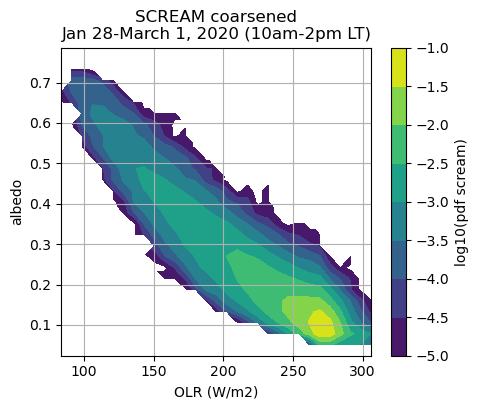

In [22]:
alb = alb.where((alb.time.dt.hour>=0)&(alb.time.dt.hour<=4))
olr = olr.where((olr.time.dt.hour>=0)&(olr.time.dt.hour<=4))
H, X, Y = np.histogram2d(olr.values.flatten(), alb.values.flatten(),
                        bins=[np.linspace(80,310,32), np.linspace(0.01,0.8,30)])
# olr_obs = ceres.adj_atmos_lw_up_all_toa_1h
# alb_obs = ceres.adj_atmos_sw_up_all_toa_1h/ceres.adj_atmos_sw_down_all_toa_1h
# olr_obs = olr_obs.where((olr_obs.time.dt.hour>=0)&(olr_obs.time.dt.hour<=4))
# alb_obs = alb_obs.where((alb_obs.time.dt.hour>=0)&(alb_obs.time.dt.hour<=4))
# H_obs, _, _ = np.histogram2d(olr_obs.values.flatten(), alb_obs.values.flatten(),
#                         bins=[np.linspace(80,310,32), np.linspace(0.01,0.8,30)])
# print(albedo.shape, olr.shape, olr_obs.shape, alb_obs.shape)

# plot alb-olr joint histogram
# plt.pcolormesh(X,Y,np.log10(H.T/(720*14*14)))
# plt.colorbar(label="log10(pdf)")
# plt.xlabel("OLR (W/m2)")
# plt.ylabel("albedo")
# plt.grid(True)
# plt.show()

# alb-olr jhist as contour plot
xmid = (X[:-1]+X[1:])/2
ymid = (Y[:-1]+Y[1:])/2

plt.figure(figsize=(5,4))
plt.contourf(xmid,ymid,np.log10(H.T/(720*14*14)), levels=np.arange(-5,-0.5,0.5))
plt.colorbar(label="log10(pdf scream)")
plt.xlabel("OLR (W/m2)")
plt.ylabel("albedo")
plt.grid(True)
plt.title("SCREAM coarsened\nJan 28-March 1, 2020 (10am-2pm LT)")
plt.savefig("../plots/jhist_scream_coarse.png")
# plt.contour(xmid,ymid,np.log10(H_obs.T/(720*10*10)),cmap="Greys", levels=np.arange(-5,-1,0.5))
# plt.colorbar(label="log10(pdf ceres syn1deg 1 hrly)")
plt.show()

#     plt.figure(figsize=(5.6,4))
#     plt.contourf(xmid,ymid,(H.T/(720*14*14) - H_obs.T/(720*10*10)), cmap="bwr", levels=np.arange(-0.008,0.0081,0.0005))
#     plt.colorbar(label="log10(scream - obs pdf)")
#     plt.xlabel("OLR (W/m2)")
#     plt.ylabel("albedo")
#     plt.grid(True)
#     plt.show()

# omega

Convert $\omega$ to $w$. 

       rgas = 287.058            ; J/(kg-K) => m2/(s2 K)
       g    = 9.80665            ; m/s2
       rho  = p/(rgas*t)         ; density => kg/m3
       w    = -omega/(rho*g)     ; array operation
       


In [ ]:
# load omega

rgas = 287.058   # J/kg/K
g = 9.80665      # m/s
rho = p/(rgas*t) # kg/m3